In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.8 MB/s 
     |████████████████████████████████| 365 kB 70.7 MB/s 
     |████████████████████████████████| 6.6 MB 41.4 MB/s 
     |████████████████████████████████| 596 kB 65.3 MB/s 
     |████████████████████████████████| 101 kB 15.2 MB/s 
     |████████████████████████████████| 115 kB 67.1 MB/s 
     |████████████████████████████████| 141 kB 67.1 MB/s 
     |████████████████████████████████| 212 kB 69.6 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

MessageError: ignored

# Data Preprocessing

In [ ]:
import pandas as pd
%cd 
#file_path_train='/gdrive/MyDrive/ML_Handson_lab/g4-sentiment-biobert/data/raw/drugsCom_raw/drugsComTrain_raw.tsv'
!wget https://uni-bonn.sciebo.de/s/Gn0aBHdwJxn8MUT/download -O drugsComTrain_raw.tsv
file_path_train='/root/drugsComTrain_raw.tsv'

data_train=pd.read_csv(file_path_train,sep='\t')
data_train.head(5)
df_train = data_train.iloc[:,3:5]
df_train.head(5)

/root
--2022-08-05 07:30:44--  https://uni-bonn.sciebo.de/s/Gn0aBHdwJxn8MUT/download
Resolving uni-bonn.sciebo.de (uni-bonn.sciebo.de)... 128.176.1.2
Connecting to uni-bonn.sciebo.de (uni-bonn.sciebo.de)|128.176.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84289175 (80M) [application/octet-stream]
Saving to: ‘drugsComTrain_raw.tsv’

drugsComTrain_raw.t 100%[===================>]  80.38M  22.2MB/s    in 4.4s    

2022-08-05 07:30:49 (18.1 MB/s) - ‘drugsComTrain_raw.tsv’ saved [84289175/84289175]



,review,rating
0,"""It has no side effect, I take it in combinati...",9.0
1,"""My son is halfway through his fourth week of ...",8.0
2,"""I used to take another oral contraceptive, wh...",5.0
3,"""This is my first time using any form of birth...",8.0
4,"""Suboxone has completely turned my life around...",9.0


In [ ]:
!wget https://uni-bonn.sciebo.de/s/JTDb25hAObc0Pej/download -O drugsComTest_raw.tsv
#file_path_test = '/gdrive/MyDrive/ML_Handson_lab/g4-sentiment-biobert/data/raw/drugsCom_raw/drugsComTest_raw.tsv'
file_path_test = 'drugsComTest_raw.tsv'
data_test=pd.read_csv(file_path_train,sep='\t')
data_test.head(5)
df_test = data_test.iloc[:,3:5]
df_test.head(5)

--2022-08-05 07:30:57--  https://uni-bonn.sciebo.de/s/JTDb25hAObc0Pej/download
Resolving uni-bonn.sciebo.de (uni-bonn.sciebo.de)... 128.176.1.2
Connecting to uni-bonn.sciebo.de (uni-bonn.sciebo.de)|128.176.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28071166 (27M) [application/octet-stream]
Saving to: ‘drugsComTest_raw.tsv’

drugsComTest_raw.ts 100%[===================>]  26.77M  14.0MB/s    in 1.9s    

2022-08-05 07:31:00 (14.0 MB/s) - ‘drugsComTest_raw.tsv’ saved [28071166/28071166]



,review,rating
0,"""It has no side effect, I take it in combinati...",9.0
1,"""My son is halfway through his fourth week of ...",8.0
2,"""I used to take another oral contraceptive, wh...",5.0
3,"""This is my first time using any form of birth...",8.0
4,"""Suboxone has completely turned my life around...",9.0


In [ ]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 4:
    return 0  # negative
  elif rating >= 7:
    return 2 #positive
  else:
    return 1 # Neutral

In [ ]:
df_train['labels'] = df_train.rating.apply(to_sentiment)
df_test['labels'] = df_test.rating.apply(to_sentiment)

In [ ]:
df_train

,review,rating,labels
0,"""It has no side effect, I take it in combinati...",9.0,2
1,"""My son is halfway through his fourth week of ...",8.0,2
2,"""I used to take another oral contraceptive, wh...",5.0,1
3,"""This is my first time using any form of birth...",8.0,2
4,"""Suboxone has completely turned my life around...",9.0,2
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",10.0,2
161293,"""I was given this in IV before surgey. I immed...",1.0,0
161294,"""Limited improvement after 4 months, developed...",2.0,0
161295,"""I&#039;ve been on thyroid medication 49 years...",10.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'sentiment')

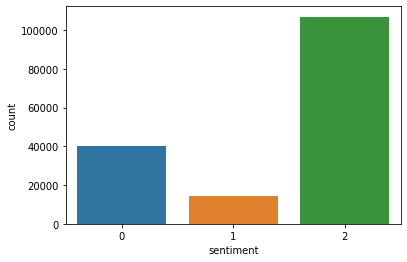

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df_train.labels)
plt.xlabel('sentiment')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'sentiment')

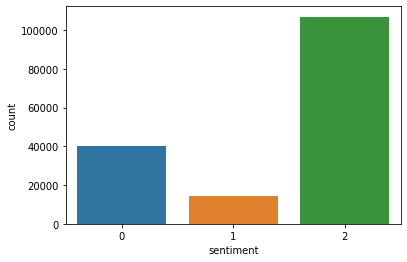

In [ ]:
sns.countplot(df_test.labels)
plt.xlabel('sentiment')

In [ ]:
import datasets
train_ds = datasets.Dataset.from_pandas(df_train)
test_ds = datasets.Dataset.from_pandas(df_test)

In [ ]:
train_ds[0]

{'labels': 2,
 'rating': 9.0,
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'}

In [ ]:
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenization(example):
  intermediate = tokenizer(
  example["review"],
  return_token_type_ids=True,
  max_length=512,
  padding='max_length',  # Add '[PAD]'
  add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
  return_tensors='np',
  truncation=True,  
  )
  return intermediate

data_train = train_ds.map(tokenization, batched=True)
data_test = test_ds.map(tokenization, batched=True)

  0%|          | 0/162 [00:00<?, ?ba/s]

  0%|          | 0/162 [00:00<?, ?ba/s]

In [14]:
implement_ds.set_format(columns=["input_ids", 'label'], type='pt')
implement_ds.rename_column('label', "labels")
implement_ds[0]

NameError: ignored

In [15]:
# len(tokenization(' '.join(["test"] * 1000))['input_ids'][0])

In [16]:
train_test_split = data_train.train_test_split(0.2)
splited_train_ds = train_test_split['train']
splited_valid_ds = train_test_split['test']

In [17]:
train_ds = splited_train_ds
train_ds

Dataset({
    features: ['review', 'rating', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 129037
})

In [18]:
dev_ds = splited_valid_ds

In [19]:
test_ds = data_test

In [20]:
train_ds.set_format(type="pt", columns=["input_ids",  "labels"])
dev_ds.set_format(type="pt", columns=["input_ids",  "labels"])
test_ds.set_format(type="pt", columns=["input_ids",  "labels"])

In [21]:
train_ds[0]

{'input_ids': tensor([  101,  1000,  1996,  2034,  2733,  1045,  2165,  2023,  5186,  6450,
          1010,  4600, 17099,  4319,  2170, 19337, 25426,  2527,  2009,  2790,
          2000,  2147,  1012,  2044,  2008,  2034,  2733,  1045,  3685,  2131,
          2000,  3637,  2005,  2195,  2847,  2044,  2635,  1996, 17357,  1010,
          2029,  2003,  2058,  1011, 21972,  1010,  1998,  5256,  2039,  1016,
          1011,  1017,  2335,  2802,  1996,  2305,  1012,  1045,  1004,  1001,
          6021,  2683,  1025,  1049,  2025,  2183,  2000,  2202,  2009,  4902,
           999,  1000,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [22]:
dev_ds['labels']

tensor([2, 2, 2,  ..., 2, 2, 2])

In [23]:
test_ds['labels']

tensor([2, 2, 1,  ..., 0, 2, 2])

# 6. Load the pre-trained BertModel

In [24]:
from transformers import BertForSequenceClassification, BertConfig

# Initialize Config | Tiny
config_tiny = BertConfig.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
# Initialize Config | Mini
config_mini = BertConfig.from_pretrained('google/bert_uncased_L-4_H-256_A-4')

# Set config params
config_tiny.num_labels = 3
config_mini.num_labels = 3

# Initialize Model | Tiny | H = Vector Length (be careful of cutting of reviews)
tiny_bert = BertForSequenceClassification.from_pretrained('google/bert_uncased_L-2_H-128_A-2', config=config_tiny)
# Initialize Model | Mini | H = Vector Length (be careful of cutting of reviews)
mini_bert = BertForSequenceClassification.from_pretrained('google/bert_uncased_L-4_H-256_A-4', config=config_mini)

Some weights of the model checkpoint at google/bert_uncased_L-2_H-128_A-2 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Some weights of the model checkpoint at google/bert_uncased_L-4_H-256_A-4 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [25]:
print(tiny_bert)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, element

In [26]:
print(mini_bert)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, element

# 7. Assign GPU device to the model trainer

In [27]:
!nvidia-smi

Fri Aug  5 07:59:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 9. Perform the training | Tiny-BERT

In [36]:
# Define Training Arguments
from transformers import TrainingArguments, Trainer, AdamW

training_args_tiny = TrainingArguments(    
    output_dir = "/root/",
    # 8. Choose and integrate Optimizer (transformers.AdamW)
    optim = "adamw_torch",
    adam_beta1 = 0.9,
    adam_beta2 = 0.999,
    adam_epsilon = 1e-6,    
    warmup_ratio = 0.1,
    learning_rate = 3e-4,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    eval_steps = 4000,
    evaluation_strategy="steps",
    weight_decay=0
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [37]:
# Define compute_metric function for evaluation
from transformers import EvalPrediction
from typing import Dict
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

def compute_metrics(prediction: EvalPrediction) -> Dict[str, float]:
  # TODO: implement evaluation function
  y_pred = np.array([np.argmax(a) for a in prediction.predictions])
  y_true = prediction.label_ids
  cr = classification_report(y_true, y_pred, output_dict = True)
  return cr

In [38]:
train_ds.format

{'columns': ['input_ids', 'labels'],
 'format_kwargs': {},
 'output_all_columns': False,
 'type': 'torch'}

In [39]:
type(tiny_bert)

transformers.models.bert.modeling_bert.BertForSequenceClassification

#### Train Tiny-BERT

In [40]:
# Instantiate Trainer Class to tiny-BERT
trainer_tiny = Trainer(
    model = tiny_bert,
    args= training_args_tiny,
    train_dataset = train_ds,
    eval_dataset = dev_ds,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [41]:
trainer_tiny.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: review, rating. If review, rating are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 129037
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 40325


Step,Training Loss,Validation Loss,0,1,2,Accuracy,Macro avg,Weighted avg
4000,0.626800,0.589506,"{'precision': 0.6773679696115672, 'recall': 0.6861114558768773, 'f1-score': 0.6817116783820447, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8180007469189593, 'recall': 0.9247982735972978, 'f1-score': 0.8681272707255312, 'support': 21316}",0.782424,"{'precision': 0.4984562388435088, 'recall': 0.536969909824725, 'f1-score': 0.5166129830358587, 'support': 32260}","{'precision': 0.7096732068346228, 'recall': 0.7824240545567266, 'f1-score': 0.7438794759922367, 'support': 32260}"
8000,0.551900,0.527821,"{'precision': 0.7152897657213317, 'recall': 0.7199950353729676, 'f1-score': 0.7176346879445785, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8270393374741201, 'recall': 0.9369956839932445, 'f1-score': 0.8785905951700171, 'support': 21316}",0.798946,"{'precision': 0.5141097010651506, 'recall': 0.5523302397887374, 'f1-score': 0.5320750943715319, 'support': 32260}","{'precision': 0.7251165579669905, 'recall': 0.7989460632362059, 'f1-score': 0.7597650281281325, 'support': 32260}"
12000,0.497900,0.511231,"{'precision': 0.7323769478110315, 'recall': 0.73501303214596, 'f1-score': 0.7336926221891843, 'support': 8057}","{'precision': 0.3776824034334764, 'recall': 0.030481468652580532, 'f1-score': 0.056410256410256404, 'support': 2887}","{'precision': 0.8377678459546385, 'recall': 0.9409363858134735, 'f1-score': 0.8863601210862407, 'support': 21316}",0.808029,"{'precision': 0.6492757323997155, 'recall': 0.5688102955373381, 'f1-score': 0.5588209998952272, 'support': 32260}","{'precision': 0.7702724603718228, 'recall': 0.8080285182889027, 'f1-score': 0.7739575390052379, 'support': 32260}"
16000,0.495700,0.497607,"{'precision': 0.7118207282913165, 'recall': 0.7885068884200075, 'f1-score': 0.7482039806854317, 'support': 8057}","{'precision': 0.36921296296296297, 'recall': 0.11049532386560443, 'f1-score': 0.17008797653958946, 'support': 2887}","{'precision': 0.8711227804726092, 'recall': 0.9183242634640646, 'f1-score': 0.8941009888779774, 'support': 21316}",0.813608,"{'precision': 0.6507188239089629, 'recall': 0.6057754919165589, 'f1-score': 0.6041309820343329, 'support': 32260}","{'precision': 0.78642004403197, 'recall': 0.8136081835089894, 'f1-score': 0.7928698121381055, 'support': 32260}"
20000,0.431800,0.484525,"{'precision': 0.755664038052322, 'recall': 0.7492863348640934, 'f1-score': 0.7524616726910134, 'support': 8057}","{'precision': 0.36904761904761907, 'recall': 0.16106685140284033, 'f1-score': 0.22425850012056908, 'support': 2887}","{'precision': 0.8633262352787797, 'recall': 0.9319759804841433, 'f1-score': 0.8963385746836013, 'support': 21316}",0.817359,"{'precision': 0.6626792974595737, 'recall': 0.614109722250359, 'f1-score': 0.6243529158317279, 'support': 32260}","{'precision': 0.7922035853062771, 'recall': 0.8173589584624923, 'f1-score': 0.800259486815723, 'support': 32260}"
24000,0.421500,0.477756,"{'precision': 0.7389633080955155, 'recall': 0.7873898473377188, 'f1-score': 0.7624083643792814, 'support': 8057}","{'precision': 0.3769601930036188, 'recall': 0.2164877034984413, 'f1-score': 0.27502750275027504, 'support': 2887}","{'precision': 0.8850887950220284, 'recall': 0.9141959091762056, 'f1-score': 0.8994069185147578, 'support': 21316}",0.820087,"{'precision': 0.6670040987070541, 'recall': 0.6393578200041219, 'f1-score': 0.6456142618814381, 'support': 32260}","{'precision': 0.8031204031375255, 'recall': 0.8200867947923125, 'f1-score': 0.8093145216151424, 'support': 32260}"
28000,0.364500,0.517901,"{'precision': 0.7718488966463034, 'recall': 0.7684001489388109, 'f1-score': 0.7701206617738524, 'support': 8057}","{'precision': 0.42522756827048114, 'recall': 0.22653273294076898, 'f1-score': 0.2955932203389831, 'support': 2887}","{'precision': 0.8741024624465883, 'recall': 0.9308969787952711, 'f1-score': 0.901606197605470

Saving model checkpoint to /root/checkpoint-500
Configuration saved in /root/checkpoint-500/config.json
Model weights saved in /root/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-500/tokenizer_config.json
Special tokens file saved in /root/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-1000
Configuration saved in /root/checkpoint-1000/config.json
Model weights saved in /root/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /root/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-1500
Configuration saved in /root/checkpoint-1500/config.json
Model weights saved in /root/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-1500/tokenizer_config.json
Special tokens file saved in /root/checkpoint-1500/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-2000

Step,Training Loss,Validation Loss,0,1,2,Accuracy,Macro avg,Weighted avg
4000,0.626800,0.589506,"{'precision': 0.6773679696115672, 'recall': 0.6861114558768773, 'f1-score': 0.6817116783820447, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8180007469189593, 'recall': 0.9247982735972978, 'f1-score': 0.8681272707255312, 'support': 21316}",0.782424,"{'precision': 0.4984562388435088, 'recall': 0.536969909824725, 'f1-score': 0.5166129830358587, 'support': 32260}","{'precision': 0.7096732068346228, 'recall': 0.7824240545567266, 'f1-score': 0.7438794759922367, 'support': 32260}"
8000,0.551900,0.527821,"{'precision': 0.7152897657213317, 'recall': 0.7199950353729676, 'f1-score': 0.7176346879445785, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8270393374741201, 'recall': 0.9369956839932445, 'f1-score': 0.8785905951700171, 'support': 21316}",0.798946,"{'precision': 0.5141097010651506, 'recall': 0.5523302397887374, 'f1-score': 0.5320750943715319, 'support': 32260}","{'precision': 0.7251165579669905, 'recall': 0.7989460632362059, 'f1-score': 0.7597650281281325, 'support': 32260}"
12000,0.497900,0.511231,"{'precision': 0.7323769478110315, 'recall': 0.73501303214596, 'f1-score': 0.7336926221891843, 'support': 8057}","{'precision': 0.3776824034334764, 'recall': 0.030481468652580532, 'f1-score': 0.056410256410256404, 'support': 2887}","{'precision': 0.8377678459546385, 'recall': 0.9409363858134735, 'f1-score': 0.8863601210862407, 'support': 21316}",0.808029,"{'precision': 0.6492757323997155, 'recall': 0.5688102955373381, 'f1-score': 0.5588209998952272, 'support': 32260}","{'precision': 0.7702724603718228, 'recall': 0.8080285182889027, 'f1-score': 0.7739575390052379, 'support': 32260}"
16000,0.495700,0.497607,"{'precision': 0.7118207282913165, 'recall': 0.7885068884200075, 'f1-score': 0.7482039806854317, 'support': 8057}","{'precision': 0.36921296296296297, 'recall': 0.11049532386560443, 'f1-score': 0.17008797653958946, 'support': 2887}","{'precision': 0.8711227804726092, 'recall': 0.9183242634640646, 'f1-score': 0.8941009888779774, 'support': 21316}",0.813608,"{'precision': 0.6507188239089629, 'recall': 0.6057754919165589, 'f1-score': 0.6041309820343329, 'support': 32260}","{'precision': 0.78642004403197, 'recall': 0.8136081835089894, 'f1-score': 0.7928698121381055, 'support': 32260}"
20000,0.431800,0.484525,"{'precision': 0.755664038052322, 'recall': 0.7492863348640934, 'f1-score': 0.7524616726910134, 'support': 8057}","{'precision': 0.36904761904761907, 'recall': 0.16106685140284033, 'f1-score': 0.22425850012056908, 'support': 2887}","{'precision': 0.8633262352787797, 'recall': 0.9319759804841433, 'f1-score': 0.8963385746836013, 'support': 21316}",0.817359,"{'precision': 0.6626792974595737, 'recall': 0.614109722250359, 'f1-score': 0.6243529158317279, 'support': 32260}","{'precision': 0.7922035853062771, 'recall': 0.8173589584624923, 'f1-score': 0.800259486815723, 'support': 32260}"
24000,0.421500,0.477756,"{'precision': 0.7389633080955155, 'recall': 0.7873898473377188, 'f1-score': 0.7624083643792814, 'support': 8057}","{'precision': 0.3769601930036188, 'recall': 0.2164877034984413, 'f1-score': 0.27502750275027504, 'support': 2887}","{'precision': 0.8850887950220284, 'recall': 0.9141959091762056, 'f1-score': 0.8994069185147578, 'support': 21316}",0.820087,"{'precision': 0.6670040987070541, 'recall': 0.6393578200041219, 'f1-score': 0.6456142618814381, 'support': 32260}","{'precision': 0.8031204031375255, 'recall': 0.8200867947923125, 'f1-score': 0.8093145216151424, 'support': 32260}"
28000,0.364500,0.517901,"{'precision': 0.7718488966463034, 'recall': 0.7684001489388109, 'f1-score': 0.7701206617738524, 'support': 8057}","{'precision': 0.42522756827048114, 'recall': 0.22653273294076898, 'f1-score': 0.2955932203389831, 'support': 2887}","{'precision': 0.8741024624465883, 'recall': 0.9308969787952711, 'f1-score': 0.901606197605470

Saving model checkpoint to /root/checkpoint-34000
Configuration saved in /root/checkpoint-34000/config.json
Model weights saved in /root/checkpoint-34000/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-34000/tokenizer_config.json
Special tokens file saved in /root/checkpoint-34000/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-34500
Configuration saved in /root/checkpoint-34500/config.json
Model weights saved in /root/checkpoint-34500/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-34500/tokenizer_config.json
Special tokens file saved in /root/checkpoint-34500/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-35000
Configuration saved in /root/checkpoint-35000/config.json
Model weights saved in /root/checkpoint-35000/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-35000/tokenizer_config.json
Special tokens file saved in /root/checkpoint-35000/special_tokens_map.json
Saving model checkpoint to /

TrainOutput(global_step=40325, training_loss=0.4398459742073679, metrics={'train_runtime': 1606.564, 'train_samples_per_second': 401.593, 'train_steps_per_second': 25.1, 'total_flos': 819954859975680.0, 'train_loss': 0.4398459742073679, 'epoch': 5.0})

In [42]:
# Saving my Model
trainer_tiny.save_model('/content/Tiny_BERT')

!zip -r /content/Tiny_BERT.zip /content/Tiny_BERT

from google.colab import files
files.download("/content/Tiny_BERT.zip")

Saving model checkpoint to /content/Tiny_BERT
Configuration saved in /content/Tiny_BERT/config.json
Model weights saved in /content/Tiny_BERT/pytorch_model.bin
tokenizer config file saved in /content/Tiny_BERT/tokenizer_config.json
Special tokens file saved in /content/Tiny_BERT/special_tokens_map.json


  adding: content/Tiny_BERT/ (stored 0%)
  adding: content/Tiny_BERT/tokenizer_config.json (deflated 45%)
  adding: content/Tiny_BERT/vocab.txt (deflated 53%)
  adding: content/Tiny_BERT/special_tokens_map.json (deflated 42%)
  adding: content/Tiny_BERT/pytorch_model.bin (deflated 7%)
  adding: content/Tiny_BERT/config.json (deflated 51%)
  adding: content/Tiny_BERT/training_args.bin (deflated 48%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 10. Evaluate, gather predictions, and generate results (confusion matrix and f1-score) | Tiny-BERT

In [43]:
# Let model predict on test dataset
preds_tiny = trainer_tiny.predict(test_dataset = test_ds)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: review, rating. If review, rating are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 161297
  Batch size = 8


In [44]:
print(preds_tiny.predictions)

[[-1.681584  -1.246517   3.1320577]
 [-1.8360718 -1.5672885  3.6848028]
 [-1.0797483  0.9753649  0.0878163]
 ...
 [ 2.9801662 -1.4642959 -1.6878015]
 [-2.1421595 -1.5366246  4.02166  ]
 [-2.3160386 -1.3406491  4.014461 ]]


In [45]:
print(preds_tiny.label_ids)

[2 2 1 ... 0 2 2]


In [46]:
y_pred_tiny = np.array([np.argmax(a) for a in preds_tiny.predictions])
y_true_tiny = preds_tiny.label_ids
cr_tiny = classification_report(y_true_tiny, y_pred_tiny)
print(cr_tiny)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     40075
           1       0.69      0.53      0.60     14356
           2       0.94      0.96      0.95    106866

    accuracy                           0.91    161297
   macro avg       0.84      0.80      0.81    161297
weighted avg       0.90      0.91      0.90    161297



In [47]:
cr_tiny = classification_report(y_true_tiny, y_pred_tiny, output_dict=True)
cr_df_tiny = pd.DataFrame(cr_tiny).transpose()
cr_df_tiny = cr_df_tiny.head(3)
cr_df_tiny['label'] = [0,1,2]
cr_df_tiny['pretrain'] = 'tiny'

# 9. Perform the training | Mini-BERT

In [33]:
# 
training_args_mini = TrainingArguments(    
    output_dir = "/root/",
    # 8. Choose and integrate Optimizer (transformers.AdamW)
    optim = "adamw_torch",
    adam_beta1 = 0.9,
    adam_beta2 = 0.999,
    adam_epsilon = 1e-6,    
    warmup_ratio = 0.1,
    learning_rate = 1e-4,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    eval_steps = 4000,
    evaluation_strategy="steps",
    weight_decay=0
)

# Instantiate Trainer Class to mini-BERT
trainer_mini = Trainer(
    model = mini_bert,
    args= training_args_mini,
    train_dataset = train_ds,
    eval_dataset = dev_ds,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [34]:
trainer_mini.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: review, rating. If review, rating are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 129037
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 40325


Step,Training Loss,Validation Loss,0,1,2,Accuracy,Macro avg,Weighted avg
4000,0.566800,0.534730,"{'precision': 0.6933470743158135, 'recall': 0.7515204170286707, 'f1-score': 0.7212626563430613, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8422238279423641, 'recall': 0.9295834115218615, 'f1-score': 0.8837499721249693, 'support': 21316}",0.801922,"{'precision': 0.5118569674193926, 'recall': 0.5603679428501774, 'f1-score': 0.5350042094893436, 'support': 32260}","{'precision': 0.7296695751451315, 'recall': 0.8019218846869188, 'f1-score': 0.7640802116544294, 'support': 32260}"
8000,0.498900,0.478255,"{'precision': 0.6818181818181818, 'recall': 0.8657068387737371, 'f1-score': 0.7628369880242796, 'support': 8057}","{'precision': 0.5, 'recall': 0.00034638032559750607, 'f1-score': 0.0006922810661128418, 'support': 2887}","{'precision': 0.8882785545669148, 'recall': 0.9179489585288046, 'f1-score': 0.9028700627537838, 'support': 21316}",0.822784,"{'precision': 0.6900322454616988, 'recall': 0.5946673925427132, 'f1-score': 0.5554664439480588, 'support': 32260}","{'precision': 0.8019669795430082, 'recall': 0.8227836329820211, 'f1-score': 0.7871591595043131, 'support': 32260}"
12000,0.427400,0.456526,"{'precision': 0.7156801007556675, 'recall': 0.8463447933473998, 'f1-score': 0.7755473414842194, 'support': 8057}","{'precision': 0.3310297166551486, 'recall': 0.1659161759612054, 'f1-score': 0.22104291647438853, 'support': 2887}","{'precision': 0.9064599483204134, 'recall': 0.9051416776130606, 'f1-score': 0.9058003333255088, 'support': 21316}",0.824303,"{'precision': 0.6510565885770765, 'recall': 0.6391342156405552, 'f1-score': 0.6341301970947056, 'support': 32260}","{'precision': 0.8073161073208233, 'recall': 0.8243025418474892, 'f1-score': 0.8119893284366541, 'support': 32260}"
16000,0.426900,0.430230,"{'precision': 0.7438471502590673, 'recall': 0.8552811220057093, 'f1-score': 0.7956815426361065, 'support': 8057}","{'precision': 0.3570731707317073, 'recall': 0.1267751991686872, 'f1-score': 0.18711656441717792, 'support': 2887}","{'precision': 0.9024623367165809, 'recall': 0.9301932820416589, 'f1-score': 0.9161180030956176, 'support': 21316}",0.839585,"{'precision': 0.6677942192357852, 'recall': 0.6374165344053518, 'f1-score': 0.6329720367163006, 'support': 32260}","{'precision': 0.8140401085861867, 'recall': 0.8395846249225046, 'f1-score': 0.8207992270451856, 'support': 32260}"
20000,0.380200,0.432773,"{'precision': 0.7434763855941341, 'recall': 0.8557775847089487, 'f1-score': 0.7956840343892447, 'support': 8057}","{'precision': 0.3654037886340977, 'recall': 0.25389677866297194, 'f1-score': 0.2996116901696301, 'support': 2887}","{'precision': 0.9218303145853194, 'recall': 0.907299680990805, 'f1-score': 0.9145072820124834, 'support': 21316}",0.835958,"{'precision': 0.6769034962711838, 'recall': 0.672324681454242, 'f1-score': 0.6699343355237861, 'support': 32260}","{'precision': 0.8274905443961329, 'recall': 0.8359578425294483, 'f1-score': 0.8298029274014868, 'support': 32260}"
24000,0.365100,0.409097,"{'precision': 0.7875147232037691, 'recall': 0.8298374084646891, 'f1-score': 0.8081223182449991, 'support': 8057}","{'precision': 0.3845824411134904, 'recall': 0.31104953238656047, 'f1-score': 0.3439295289161241, 'support': 2887}","{'precision': 0.9201772801492886, 'recall': 0.9253143178832801, 'f1-score': 0.9227386493883184, 'support': 21316}",0.846497,"{'precision': 0.6974248148221828, 'recall': 0.68873375291151, 'f1-score': 0.6915968321831473, 'support': 32260}","{'precision': 0.83911328381927, 'recall': 0.84649721016739, 'f1-score': 0.8423144178066398, 'support': 32260}"
28000,0.313700,0.434097,"{'precision': 0.8036250150042011, 'recall': 0.8309544495469778, 'f1-score': 0.8170612643397609, 'support': 8057}","{'precision': 0.40466278101582015, 'recall': 0.3366816764807759, 'f1-score': 0.36755530346001136, 'support': 2887}","{'precision': 0.9217262043015748, 'recall': 0.9308500656783637,

Saving model checkpoint to /root/checkpoint-500
Configuration saved in /root/checkpoint-500/config.json
Model weights saved in /root/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-500/tokenizer_config.json
Special tokens file saved in /root/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-1000
Configuration saved in /root/checkpoint-1000/config.json
Model weights saved in /root/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /root/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-1500
Configuration saved in /root/checkpoint-1500/config.json
Model weights saved in /root/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in /root/checkpoint-1500/tokenizer_config.json
Special tokens file saved in /root/checkpoint-1500/special_tokens_map.json
Saving model checkpoint to /root/checkpoint-2000

Step,Training Loss,Validation Loss,0,1,2,Accuracy,Macro avg,Weighted avg
4000,0.566800,0.534730,"{'precision': 0.6933470743158135, 'recall': 0.7515204170286707, 'f1-score': 0.7212626563430613, 'support': 8057}","{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2887}","{'precision': 0.8422238279423641, 'recall': 0.9295834115218615, 'f1-score': 0.8837499721249693, 'support': 21316}",0.801922,"{'precision': 0.5118569674193926, 'recall': 0.5603679428501774, 'f1-score': 0.5350042094893436, 'support': 32260}","{'precision': 0.7296695751451315, 'recall': 0.8019218846869188, 'f1-score': 0.7640802116544294, 'support': 32260}"
8000,0.498900,0.478255,"{'precision': 0.6818181818181818, 'recall': 0.8657068387737371, 'f1-score': 0.7628369880242796, 'support': 8057}","{'precision': 0.5, 'recall': 0.00034638032559750607, 'f1-score': 0.0006922810661128418, 'support': 2887}","{'precision': 0.8882785545669148, 'recall': 0.9179489585288046, 'f1-score': 0.9028700627537838, 'support': 21316}",0.822784,"{'precision': 0.6900322454616988, 'recall': 0.5946673925427132, 'f1-score': 0.5554664439480588, 'support': 32260}","{'precision': 0.8019669795430082, 'recall': 0.8227836329820211, 'f1-score': 0.7871591595043131, 'support': 32260}"
12000,0.427400,0.456526,"{'precision': 0.7156801007556675, 'recall': 0.8463447933473998, 'f1-score': 0.7755473414842194, 'support': 8057}","{'precision': 0.3310297166551486, 'recall': 0.1659161759612054, 'f1-score': 0.22104291647438853, 'support': 2887}","{'precision': 0.9064599483204134, 'recall': 0.9051416776130606, 'f1-score': 0.9058003333255088, 'support': 21316}",0.824303,"{'precision': 0.6510565885770765, 'recall': 0.6391342156405552, 'f1-score': 0.6341301970947056, 'support': 32260}","{'precision': 0.8073161073208233, 'recall': 0.8243025418474892, 'f1-score': 0.8119893284366541, 'support': 32260}"
16000,0.426900,0.430230,"{'precision': 0.7438471502590673, 'recall': 0.8552811220057093, 'f1-score': 0.7956815426361065, 'support': 8057}","{'precision': 0.3570731707317073, 'recall': 0.1267751991686872, 'f1-score': 0.18711656441717792, 'support': 2887}","{'precision': 0.9024623367165809, 'recall': 0.9301932820416589, 'f1-score': 0.9161180030956176, 'support': 21316}",0.839585,"{'precision': 0.6677942192357852, 'recall': 0.6374165344053518, 'f1-score': 0.6329720367163006, 'support': 32260}","{'precision': 0.8140401085861867, 'recall': 0.8395846249225046, 'f1-score': 0.8207992270451856, 'support': 32260}"
20000,0.380200,0.432773,"{'precision': 0.7434763855941341, 'recall': 0.8557775847089487, 'f1-score': 0.7956840343892447, 'support': 8057}","{'precision': 0.3654037886340977, 'recall': 0.25389677866297194, 'f1-score': 0.2996116901696301, 'support': 2887}","{'precision': 0.9218303145853194, 'recall': 0.907299680990805, 'f1-score': 0.9145072820124834, 'support': 21316}",0.835958,"{'precision': 0.6769034962711838, 'recall': 0.672324681454242, 'f1-score': 0.6699343355237861, 'support': 32260}","{'precision': 0.8274905443961329, 'recall': 0.8359578425294483, 'f1-score': 0.8298029274014868, 'support': 32260}"
24000,0.365100,0.409097,"{'precision': 0.7875147232037691, 'recall': 0.8298374084646891, 'f1-score': 0.8081223182449991, 'support': 8057}","{'precision': 0.3845824411134904, 'recall': 0.31104953238656047, 'f1-score': 0.3439295289161241, 'support': 2887}","{'precision': 0.9201772801492886, 'recall': 0.9253143178832801, 'f1-score': 0.9227386493883184, 'support': 21316}",0.846497,"{'precision': 0.6974248148221828, 'recall': 0.68873375291151, 'f1-score': 0.6915968321831473, 'support': 32260}","{'precision': 0.83911328381927, 'recall': 0.84649721016739, 'f1-score': 0.8423144178066398, 'support': 32260}"
28000,0.313700,0.434097,"{'precision': 0.8036250150042011, 'recall': 0.8309544495469778, 'f1-score': 0.8170612643397609, 'support': 8057}","{'precision': 0.40466278101582015, 'recall': 0.3366816764807759, 'f1-score': 0.36755530346001136, 'support': 2887}","{'precision': 0.9217262043015748, 'recall': 0.9308500656783637,

Trainer is attempting to log a value of "{'precision': 0.8097968936678615, 'recall': 0.8412560506391957, 'f1-score': 0.8252267608206002, 'support': 8057}" of type <class 'dict'> for key "eval/0" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.45223700120918986, 'recall': 0.3886387253204018, 'f1-score': 0.4180327868852459, 'support': 2887}" of type <class 'dict'> for key "eval/1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.929048530991639, 'recall': 0.933101895289923, 'f1-score': 0.931070801638385, 'support': 21316}" of type <class 'dict'> for key "eval/2" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.7303608086228968, 'recall': 0.72

TrainOutput(global_step=40325, training_loss=0.3902731156748271, metrics={'train_runtime': 5237.8508, 'train_samples_per_second': 123.177, 'train_steps_per_second': 7.699, 'total_flos': 6394186771276800.0, 'train_loss': 0.3902731156748271, 'epoch': 5.0})

In [35]:
# Saving my Model
trainer_mini.save_model('/content/Mini_BERT')

!zip -r /content/Mini_BERT.zip /content/Mini_BERT

from google.colab import files
files.download("/content/Mini_BERT.zip")

Saving model checkpoint to /content/Mini_BERT
Configuration saved in /content/Mini_BERT/config.json
Model weights saved in /content/Mini_BERT/pytorch_model.bin
tokenizer config file saved in /content/Mini_BERT/tokenizer_config.json
Special tokens file saved in /content/Mini_BERT/special_tokens_map.json


  adding: content/Mini_BERT/ (stored 0%)
  adding: content/Mini_BERT/tokenizer_config.json (deflated 45%)
  adding: content/Mini_BERT/vocab.txt (deflated 53%)
  adding: content/Mini_BERT/special_tokens_map.json (deflated 42%)
  adding: content/Mini_BERT/pytorch_model.bin (deflated 7%)
  adding: content/Mini_BERT/config.json (deflated 51%)
  adding: content/Mini_BERT/training_args.bin (deflated 48%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 10. Evaluate, gather predictions, and generate results (confusion matrix and f1-score) | Mini-BERT

In [48]:
# Let model predict on test dataset
preds_mini = trainer_mini.predict(test_dataset = test_ds)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: review, rating. If review, rating are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 161297
  Batch size = 8


In [49]:
print(preds_mini.predictions)

[[-2.741218  -1.6703717  4.3138456]
 [-2.534512  -1.9745996  4.4482474]
 [-0.5631063  1.8577607 -1.5804521]
 ...
 [ 3.6996205 -0.8984923 -1.9910531]
 [-2.5476296 -1.8154603  4.334631 ]
 [-2.5843816 -1.9758133  4.487733 ]]


In [50]:
print(preds_mini.label_ids)

[2 2 1 ... 0 2 2]


In [51]:
y_pred_mini = np.array([np.argmax(a) for a in preds_mini.predictions])
y_true_mini = preds_mini.label_ids
cr_mini = classification_report(y_true_mini, y_pred_mini)
print(cr_mini)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     40075
           1       0.69      0.64      0.66     14356
           2       0.97      0.97      0.97    106866

    accuracy                           0.93    161297
   macro avg       0.85      0.84      0.85    161297
weighted avg       0.93      0.93      0.93    161297



In [52]:
cr_mini = classification_report(y_true_mini, y_pred_mini, output_dict=True)
cr_df_mini = pd.DataFrame(cr_mini).transpose()
cr_df_mini = cr_df_mini.head(3)
cr_df_mini['label'] = [0,1,2]
cr_df_mini['pretrain'] = 'mini'

# Visualize Tiny-BERT vs. Mini-BERT Performance

In [53]:
import seaborn as sns

# Concatenate DataFrames
plot_df = pd.concat([cr_df_mini, cr_df_tiny])
plot_df

,precision,recall,f1-score,support,label,pretrain
0,0.900280,0.922745,0.911374,40075.0,0,mini
1,0.690001,0.637852,0.662902,14356.0,1,mini
2,0.967714,0.968484,0.968099,106866.0,2,mini
0,0.875474,0.893824,0.884554,40075.0,0,tiny
1,0.691279,0.532809,0.601786,14356.0,1,tiny
2,0.940823,0.962402,0.951490,106866.0,2,tiny


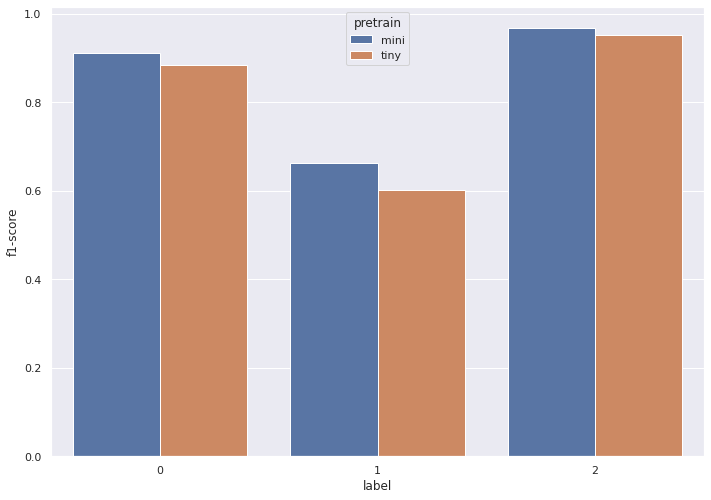

In [54]:
# Plot f1-score for different labels
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="label", y="f1-score", data=plot_df, hue='pretrain')

# Confusion Matrix | Tiny-BERT

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Generate the confusion matrix for 
cf_matrix_tiny = confusion_matrix(y_true_tiny, y_pred_tiny)
print(cf_matrix_tiny)

[[ 34373   2160   3542]
 [  3571   5456   5329]
 [  2894   2295 101677]]


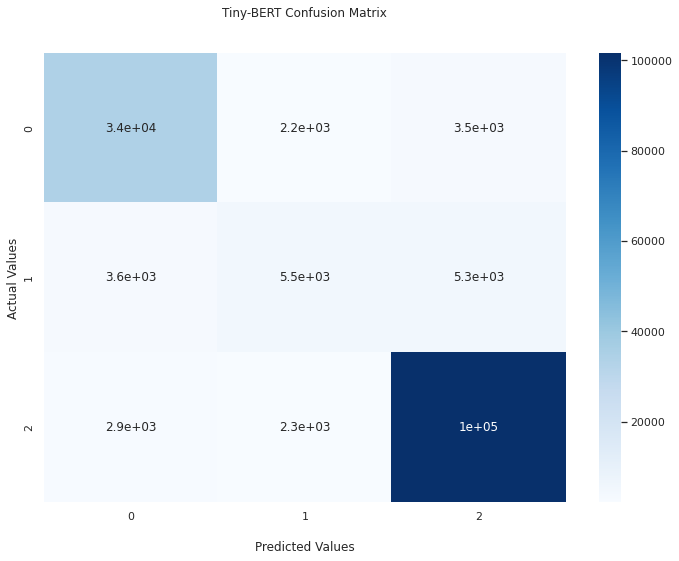

In [ ]:
ax = sns.heatmap(cf_matrix_tiny, annot=True, cmap='Blues')

ax.set_title('Tiny-BERT Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Generate the confusion matrix for 
cf_matrix_mini = confusion_matrix(y_true_mini, y_pred_mini)
print(cf_matrix_mini)

[[25921     0 14154]
 [ 4759     0  9597]
 [ 7304     0 99562]]


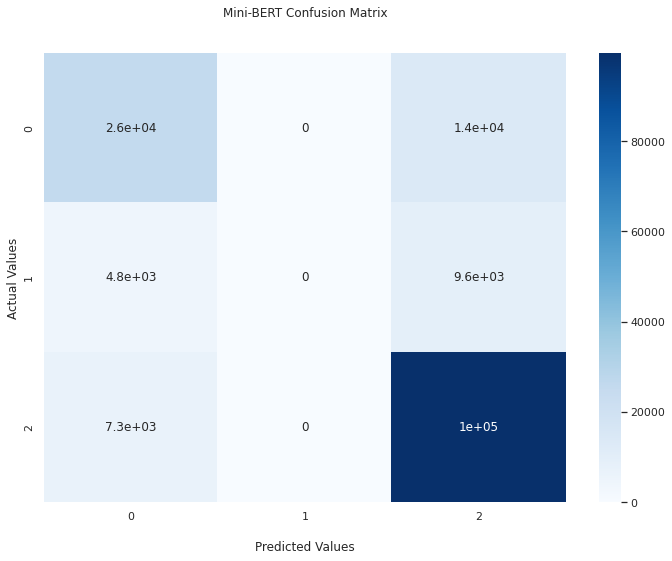

In [ ]:
ax = sns.heatmap(cf_matrix_mini, annot=True, cmap='Blues')

ax.set_title('Mini-BERT Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()